In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [ ]:
SE LEE EL ARCHIVO CSV

In [3]:
data = data.set_index('id')

In [ ]:
SETEAMOS EL ID DE LA SOLICITUD COMO INDEX DE LA TABLA

In [4]:
data.head()

,Loan Amount,Term,State,Annual Income,Income Verification Status,Average Account Balance,Due Amount,Home Ownership,Loan Purpose,Due Settlement,Installment Amount,Payment Plan,Approve Loan
id,,,,,,,,,,,,,
1267,25000.0,36 months,CO,50000.0,Partially Verified,4073.0,783.30,OWN,credit_card,N,783.30,n,1
1,8000.0,36 months,FL,65000.0,Partially Verified,2298.0,263.78,RENT,debt_consolidation,Y,263.78,n,1
2219,11000.0,36 months,MI,49000.0,Verified,1441.0,3978.72,MORTGAGE,debt_consolidation,N,342.12,n,1
453,35000.0,36 months,CA,108000.0,Verified,33603.0,1154.00,MORTGAGE,credit_card,Y,1154.00,n,1
1108,35000.0,36 months,CA,87000.0,Partially Verified,3399.0,1300.55,RENT,debt_consolidation,Y,1300.55,n,0


In [ ]:
SE HACE UNA REVISIÓN DE LOS CAMPOS DE LA TABLA, ALGUNOS NO HACEN SENTIDO TENERLOS DENTRO DEL MODELO DEBIDO A QUE SON CATEGÓRICOS Y NO TAN
RELEVANTES PARA DETERMINAR SI SE DEBE OTORGAR UN PRÉSTAMO. HAY MÁS DE 5 ESTADOS Y MÁS DE 5 MOTIVOS DE PRÉSTAMOS, QUE EN REALIDAD NO HACEN
NINGUNA DIFERENCIA. POR LO TANTO DROPEAMOS AQUELLAS COLUMNAS

In [6]:
data = data.drop(['State','Loan Purpose'],axis=1)

In [ ]:
DROPEAMOS LAS COLUMNAS QUE NO VAMOS A UTILIZAR

In [7]:
data.isna().sum()

Loan Amount                    94
Term                           44
Annual Income                  72
Income Verification Status     15
Average Account Balance       106
Due Amount                     41
Home Ownership                 36
Due Settlement                107
Installment Amount             16
Payment Plan                   37
Approve Loan                    0
dtype: int64

In [ ]:
REVISAMOS SI NUESTRA TABLA CUENTA CON COLUMNAS NULAS. AL NO SER MÁS DEL 30% DE NUESTRA DATA, PODEMOS DROPEAR AQUELLAS FILAS CON DATOS
INCOMPLETOS.

In [8]:
data.shape

(1894, 11)

In [9]:
data = data.dropna()
data.shape

(1396, 11)

In [ ]:
SE DROPEAN AQUELLAS FILAS NULAS.

In [10]:
y = data['Approve Loan']
x = data[['Loan Amount','Term','Annual Income','Income Verification Status','Average Account Balance',
          'Due Amount','Home Ownership','Due Settlement','Installment Amount','Payment Plan']]

In [ ]:
ASIGNAMOS NUESTRA VARIABLE DEPENDIENTE "APPROVE LOAN" A LA VARIABLE Y
ASIGNAMOS NUETRAS VARIABLES INDEPENDIENTES A LA VARIABLE X

In [11]:
x = pd.get_dummies(x)

In [12]:
x.head()

,Loan Amount,Annual Income,Average Account Balance,Due Amount,Installment Amount,Term_ 36 months,Term_ 60 months,Income Verification Status_Not Verified,Income Verification Status_Partially Verified,Income Verification Status_Verified,Home Ownership_ANY,Home Ownership_MORTGAGE,Home Ownership_OWN,Home Ownership_RENT,Due Settlement_N,Due Settlement_Y,Payment Plan_n
id,,,,,,,,,,,,,,,,,
1267,25000.0,50000.0,4073.0,783.30,783.30,1,0,0,1,0,0,0,1,0,1,0,1
1,8000.0,65000.0,2298.0,263.78,263.78,1,0,0,1,0,0,0,0,1,0,1,1
2219,11000.0,49000.0,1441.0,3978.72,342.12,1,0,0,0,1,0,1,0,0,1,0,1
453,35000.0,108000.0,33603.0,1154.00,1154.00,1,0,0,0,1,0,1,0,0,0,1,1
1108,35000.0,87000.0,3399.0,1300.55,1300.55,1,0,0,1,0,0,0,0,1,0,1,1


In [ ]:
LA FUNCIÓN GET DUMMIES NOS AYUDA A PIVOTEAR AQUELLAS COLUMNAS CON VARIABLES CATEGÓRICAS, YA QUE NO DEBERÍAMOS METER COLUMNAS CON DATOS STRINGS
DENTRO DE NUESTRO MODELO PREDICTIVO. POR EJEMPLO, LA COLUMNA "TERM" NOS DECIA SI EL CLIENTE IBA A PAGAR EN UN PLAZO DE 36 O 60 MESES,
AHORA QUE SE SEPARO EN 2, E ASIGNARÁ EL VALOR DE 1 AL PLAZO QUE CORRESPONDA.

In [14]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

x = normalize(x)
x = x.fillna(0)

In [15]:
x.head()

,Loan Amount,Annual Income,Average Account Balance,Due Amount,Installment Amount,Term_ 36 months,Term_ 60 months,Income Verification Status_Not Verified,Income Verification Status_Partially Verified,Income Verification Status_Verified,Home Ownership_ANY,Home Ownership_MORTGAGE,Home Ownership_OWN,Home Ownership_RENT,Due Settlement_N,Due Settlement_Y,Payment Plan_n
id,,,,,,,,,,,,,,,,,
1267,0.615385,0.092628,0.032752,0.019355,0.511057,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.179487,0.120983,0.018419,0.006518,0.158546,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2219,0.256410,0.090737,0.011499,0.098310,0.211702,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
453,0.871795,0.202268,0.271207,0.028514,0.762588,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1108,0.871795,0.162571,0.027310,0.032135,0.862027,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
SE NORAMLIZAN LOS DATOS PARA QUE TODOS LOS VALORES ESTEN DENTRO DEL MISMO INTERVALO NUMÉRICO.

In [16]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
DIVIDIMOS EL DATASET EN TRAIN Y TEST PARA EVALUAR EL ACCURACY DEL MODELO PREDICTIVO

In [18]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="auc")
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
EL MODELO XGBOOST ESTÁ FORMADO POR ARBOLES DE DECISION CON RESULTADOS POTENCIADOS, ESTO SE DEBE AL PROCESAMIENTO SECUENCIAL DE LA DATA
CON UNA FUNCIÓN DE COSTO, LO CUAL MINIMIZA EL ERROR ITERACIÓN TRAS ITERACIÓN. MUY PARECIDO A UNA RED NEURONAL. 

In [19]:
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
accuracy_score(y_test, y_pred)

0.8496420047732697

In [ ]:
LA PRECISIÓN DEL MODELO ES DE 84.96%. ESTO QUIERE DECIR QUE 8 DE CADA 10 PRÉSTAMOS ESTAN CORRECTAMENTE CLASIFICADOS.

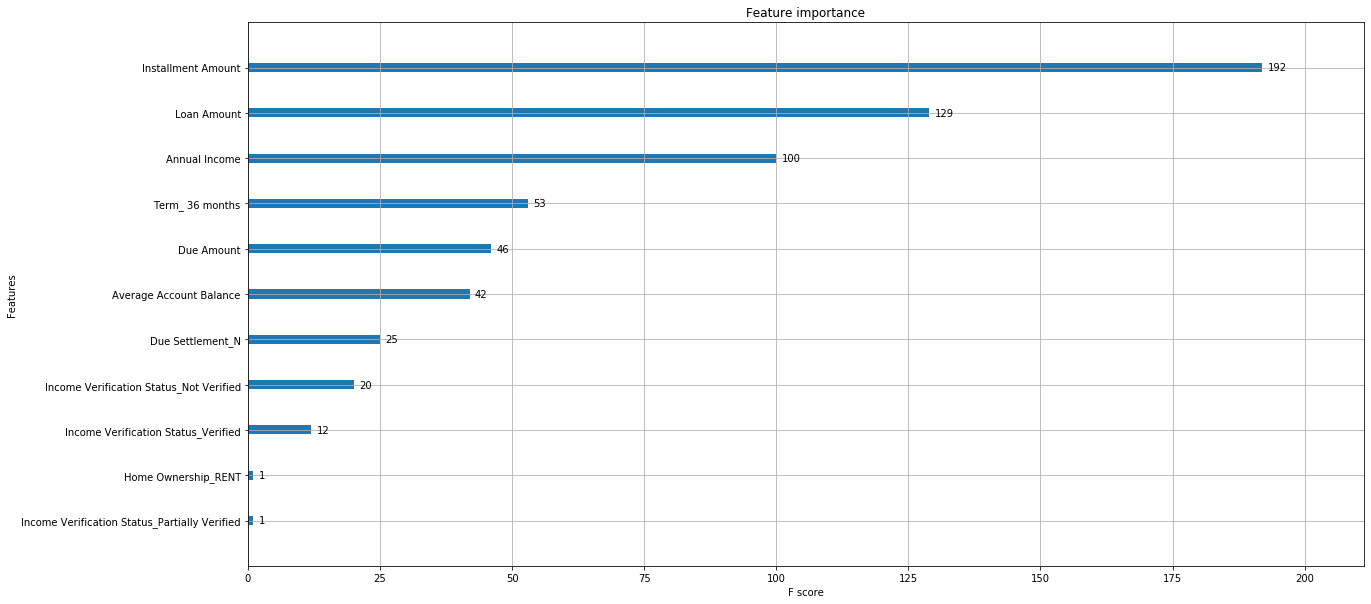

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_importance(xgb_model, ax=ax)
plt.show()

In [ ]:
LA VARIABLES MÁS SIGNIFICATIVA PARA PREDECIR LA CLASIFICACIÓN SON EL PAGO MENSUAL EN CASO SE DE EL PRÉSTAMO, LA CANTIDAD SOLICITADA Y SUS
INGRESOS ANUALES.

In [ ]:
AHORA PROCEDEMOS A OBTENER LOS RESULTADOS DEL DATA SET DE TEST.CSV, A ESTE SET DE DATOS SE LE DA EL MISMO TRATAMIENTO QUE AL TRAIN.CSV

In [21]:
data_test = pd.read_csv('test.csv')

In [22]:
data_test = data_test.set_index('id')

In [23]:
data_test = data_test.drop(['State','Loan Purpose'],axis=1)

In [24]:
data_test.isna().sum()

Loan Amount                   0
Term                          0
Annual Income                 0
Income Verification Status    0
Average Account Balance       0
Due Amount                    0
Home Ownership                0
Due Settlement                0
Installment Amount            0
Payment Plan                  0
dtype: int64

In [25]:
x_test = pd.get_dummies(data_test)

In [26]:
x_test = normalize(x_test)

In [27]:
y_pred_test = xgb_model.predict(x_test)

In [28]:
y_pred_test = pd.DataFrame(y_pred_test)

In [29]:
x_test = x_test.reset_index()
identificador = x_test['id']

In [ ]:
GUARDAMOS LOS ARCHIVOS EN CSV Y TENEMOS LOS RESULTADOS

In [30]:
identificador.to_csv('id.csv')
y_pred_test.to_csv('prediccion.csv')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
